# Total Energy Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn")

C:\Users\PC\AppData\Local\Temp\ipykernel_26284\4109155056.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# Load data

Here we define the directory path where the data is stored and will be stored. The files train.csv and test.csv should be in that directory.

In [2]:
data = pd.read_csv(f'csv/train.csv',delimiter=';',decimal=',',na_values=["#VALEUR!"],index_col="time")
data.index = pd.to_datetime(data.index, format='%d/%m/%Y %H:%M')

test = pd.read_csv(f'csv/test.csv',delimiter=';',decimal=',',na_values=["#VALEUR!"],index_col="time")
test.index = pd.to_datetime(test.index, format='%d/%m/%Y %H:%M')

In [3]:
data.describe()

,Amb temp °C,Comp inlet temp °C,amb pressure,HR %,C/H,Network Frequency (Hz),Lower Heating Value (Wh/Nm3),EOH (h),DP filtre,CTRL anti givrage,IGV %,Net Power (MW)
count,368502.000000,368517.000000,368572.000000,368553.000000,368536.000000,368219.000000,368063.000000,367002.000000,368553.000000,368519.000000,368341.000000,368207.000000
mean,14.487902,19.880848,992.565003,61.181880,3.288417,44.976282,10771.497116,27108.533262,2.726039,-10.856125,21.541416,116.847774
std,7.576516,7.326484,8.702163,17.264710,0.015378,1.313475,108.693864,934.778961,1.806945,7.073100,39.018238,169.242280
min,-1.092109,1.520982,948.226082,5.427441,3.208825,41.268475,518.654730,25523.874080,1.227618,-38.742719,-4.989705,1.259763
25%,8.056436,15.194340,987.967126,49.381600,3.276918,44.776016,10735.220820,26594.225637,1.566103,-15.450205,-2.691857,8.793495
50%,14.180040,20.892922,993.306435,65.136250,3.287632,44.791741,10763.482070,27019.401420,1.578827,-10.275179,-2.363789,9.631217
75%,19.532917,25.142531,998.070473,75.373906,3.301645,46.266140,10805.505570,27363.696340,4.621535,-4.644795,42.333016,298.661378
max,42.857579,43.273121,1012.959786,91.678914,3.579373,46.359951,10989.565000,29407.241270,7.250754,0.997576,203.764500,434.143647


The following cell displays the first rows of the dataframe.

Getting the shape of the dataframe

In [8]:
data.shape, test.shape

((368581, 12), (156960, 12))

The training set contains 368591 rows andd 12 columns and the test set contains 156960 rows and 12 columns. The test set contains almost half less data than the training set. All the values in the column Net Power (MW) are NaN and should be filled with our model's predictions.

Here are the list of the columns of both dataset : 

<table border="0" padding="0" margin="0">
<tbody>
<tr><td>Amb temp (°C)</td><td>Température ambiante</td></tr>
<tr><td>Comp inlet temp (°C)</td><td>Température entrée compresseur</td></tr>
<tr><td>amb pressure</td><td>Pression ambiante</td></tr>
<tr><td>HR %</td><td>%Humidité relative ambiante</td></tr>
<tr><td>C/H</td><td>Rapport Carbonne/hydrogène du Gaz Nat</td></tr>
<tr><td>Network Frequency (Hz)</td><td>Fréquence du réseau électrique en Hz</td></tr>
<tr><td>Lower Heating Value (Wh/Nm3) &nbsp;</td><td>le pouvoir calorifique inférieur du Gaz Nat</td></tr>
<tr><td>EOH (h)</td><td>Heures d'Opérations Equivalentes </td></tr>
<tr><td>DP filtre</td><td>Perte de charge au niveau des filtres d'air entrée turbine à gaz</td></tr>
<tr><td>CTRL anti givrage</td><td>Control de la vanne d'ouverture de l'anti-givre entrée turbine gaz</td></tr>
<tr><td>IGV %</td><td>% d'ouverture de la valve IGV (Inlet Guide Vanes) afin de controller la charge de la CCGT</td></tr>
<tr><td>Net Power (MW)</td><td>Production d'électricité NETTE générée par la CCGT</td></tr>
</tbody>
</table>

# Checks

We check that this data has the exact types we are waiting for.

In [9]:
assert data.dtypes.equals(pd.Series(dict(zip(data.columns,["float64"]*len(data.columns)))))

assert test.dtypes.equals(pd.Series(dict(zip(test.columns,["float64"]*len(test.columns)))))

Statistical metrics of the training set such as the minimum, average, standard deviation, maximum, and quantiles are computed below.

# EDA and first models

In [12]:
data.isna().sum()

Amb temp °C                       79
Comp inlet temp °C                64
amb pressure                       9
HR %                              28
C/H                               45
Network Frequency (Hz)           362
Lower Heating Value (Wh/Nm3)     518
EOH (h)                         1579
DP filtre                         28
CTRL anti givrage                 62
IGV %                            240
Net Power (MW)                   374
dtype: int64

There are 3388 NaN values in the dataframe.

### Imputing strategy

In [7]:
from sklearn.impute import SimpleImputer

In [14]:
# Dropping all the NaN values
# data.dropna(inplace=True)

# Replace the Nans using a given strategy

chosen_strategy = 'median' # "mean" / "constant" / "most_frequent"
for col in data.columns:
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
    data[col] = imp_mean.fit_transform(data[[col]]).squeeze()

In [15]:
data.isna().sum()

Amb temp °C                     0
Comp inlet temp °C              0
amb pressure                    0
HR %                            0
C/H                             0
Network Frequency (Hz)          0
Lower Heating Value (Wh/Nm3)    0
EOH (h)                         0
DP filtre                       0
CTRL anti givrage               0
IGV %                           0
Net Power (MW)                  0
dtype: int64

In [16]:
data

,Amb temp °C,Comp inlet temp °C,amb pressure,HR %,C/H,Network Frequency (Hz),Lower Heating Value (Wh/Nm3),EOH (h),DP filtre,CTRL anti givrage,IGV %,Net Power (MW)
time,,,,,,,,,,,,
2022-01-01 00:00:00,2.415345,13.756624,1009.650948,77.891805,3.287632,44.799709,10763.48207,25523.87408,1.566854,-1.289541,-1.575997,8.292017
2022-01-01 00:01:00,2.410162,13.754808,1009.653573,78.010106,3.287632,44.799660,10763.48207,25523.87408,1.566860,-1.284832,-1.575923,8.300175
2022-01-01 00:02:00,2.404979,13.752992,1009.656258,78.128415,3.287632,44.799614,10763.48207,25523.87408,1.566866,-1.280124,-1.575849,8.308332
2022-01-01 00:03:00,2.399796,13.751176,1009.658883,78.246716,3.287632,44.799565,10763.48207,25523.87408,1.566872,-1.275416,-1.575776,8.316489
2022-01-01 00:04:00,2.394613,13.749360,1009.658883,78.365018,3.287632,44.799519,10763.48207,25523.87408,1.566878,-1.270708,-1.575702,8.324646
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-14 23:56:00,8.086711,8.278509,995.844857,78.589787,3.261941,46.259384,10743.42727,29194.19439,6.291690,-4.045888,86.786679,405.827241
2022-12-14 23:57:00,8.065194,8.241186,995.846932,78.370259,3.262297,46.259400,10743.52455,29194.21197,6.292650,-4.021044,85.868084,401.745393
2022-12-14 23:58:00,8.043678,8.210472,995.849007,78.805196,3.262654,46.259415,10743.62183,29194.22759,6.293610,-3.996200,83.583477,402.876436


In [17]:
assert (data.isna().sum(axis=0).sum() == 0)

Let's start by checking all the variables

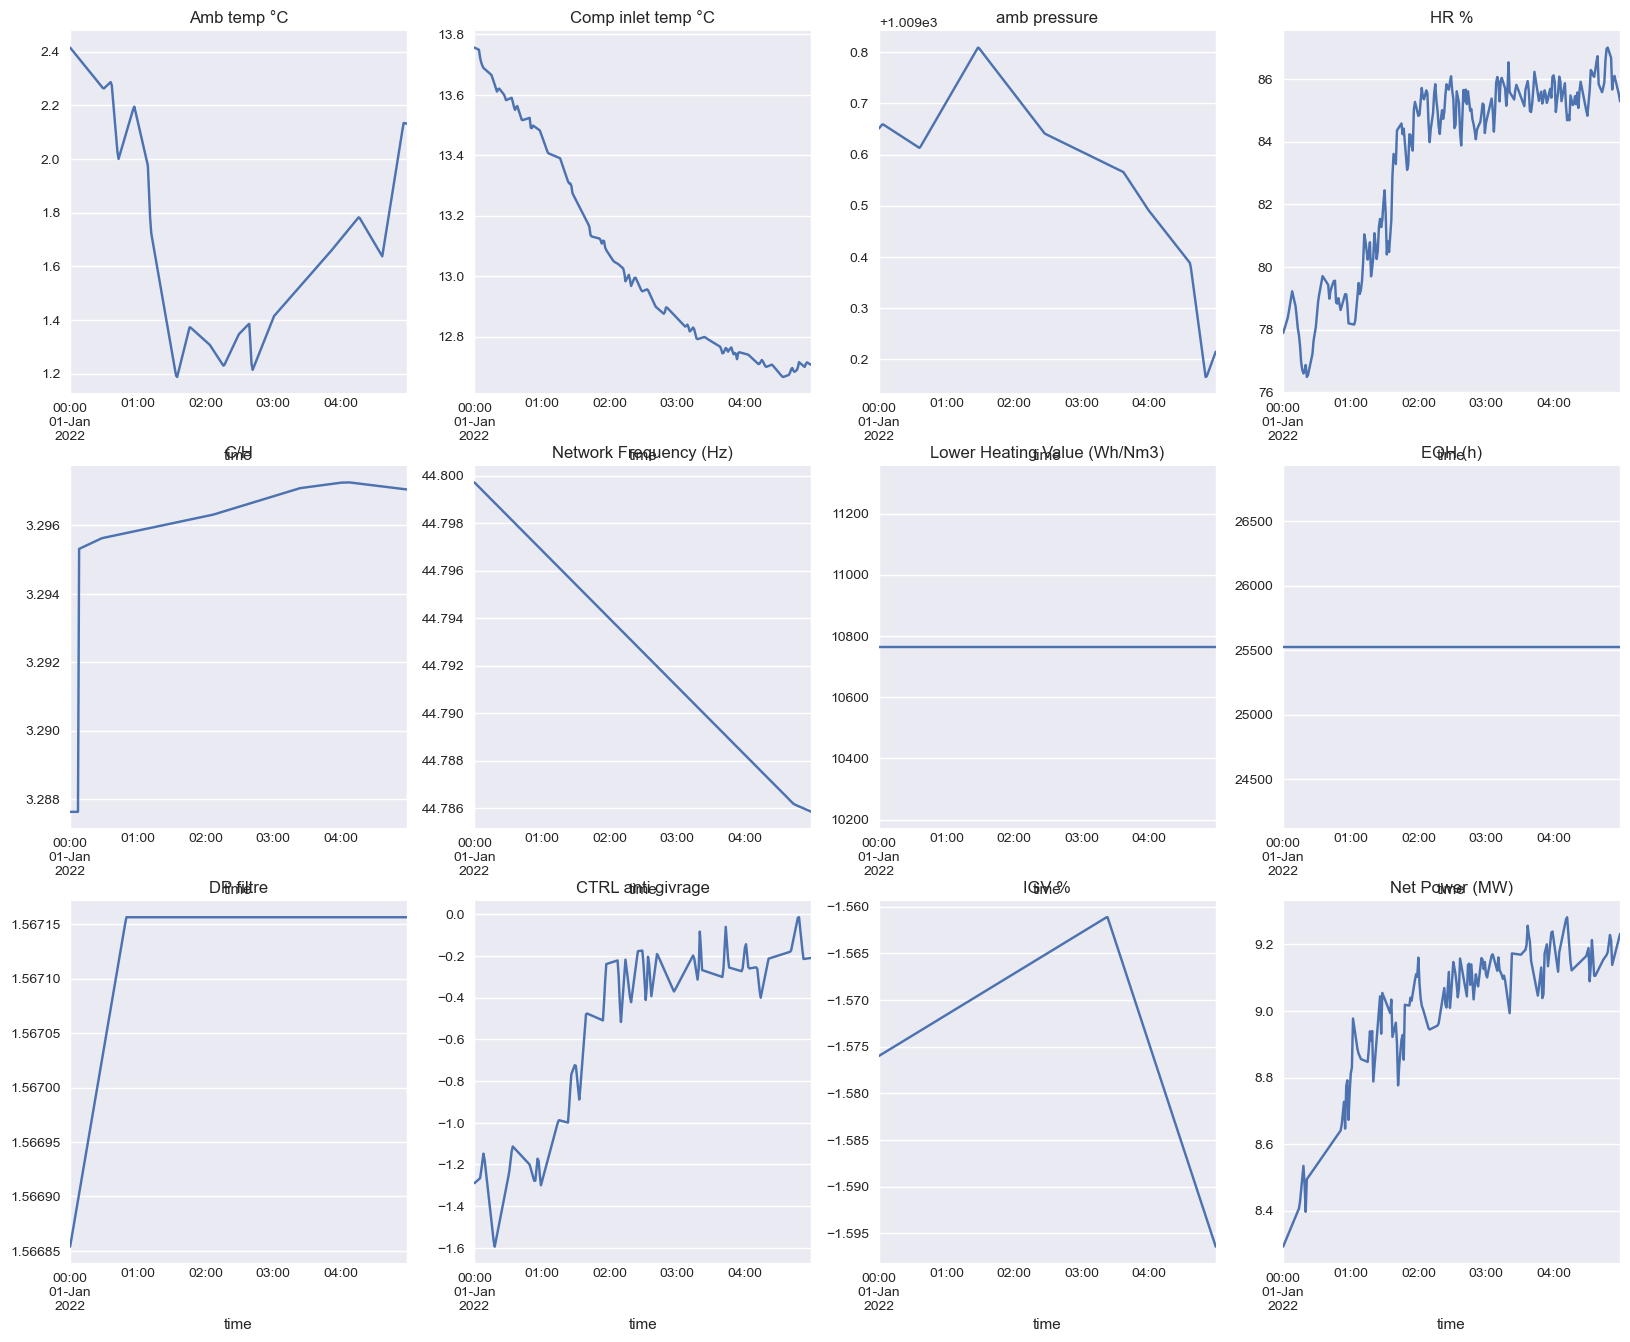

In [18]:
fig, ax = plt.subplots(figsize=(20,16),nrows=3, ncols=4)
for i,col in enumerate(data.columns):
    data.head(300)[col].plot(ax=ax[i//4,i%4],title=col)

array([[<Axes: title={'center': 'Amb temp °C'}>,
        <Axes: title={'center': 'Comp inlet temp °C'}>,
        <Axes: title={'center': 'amb pressure'}>],
       [<Axes: title={'center': 'HR %'}>,
        <Axes: title={'center': 'C/H'}>,
        <Axes: title={'center': 'Network Frequency (Hz)'}>],
       [<Axes: title={'center': 'Lower Heating Value (Wh/Nm3)'}>,
        <Axes: title={'center': 'EOH (h)'}>,
        <Axes: title={'center': 'DP filtre'}>],
       [<Axes: title={'center': 'CTRL anti givrage'}>,
        <Axes: title={'center': 'IGV %'}>,
        <Axes: title={'center': 'Net Power (MW)'}>]], dtype=object)

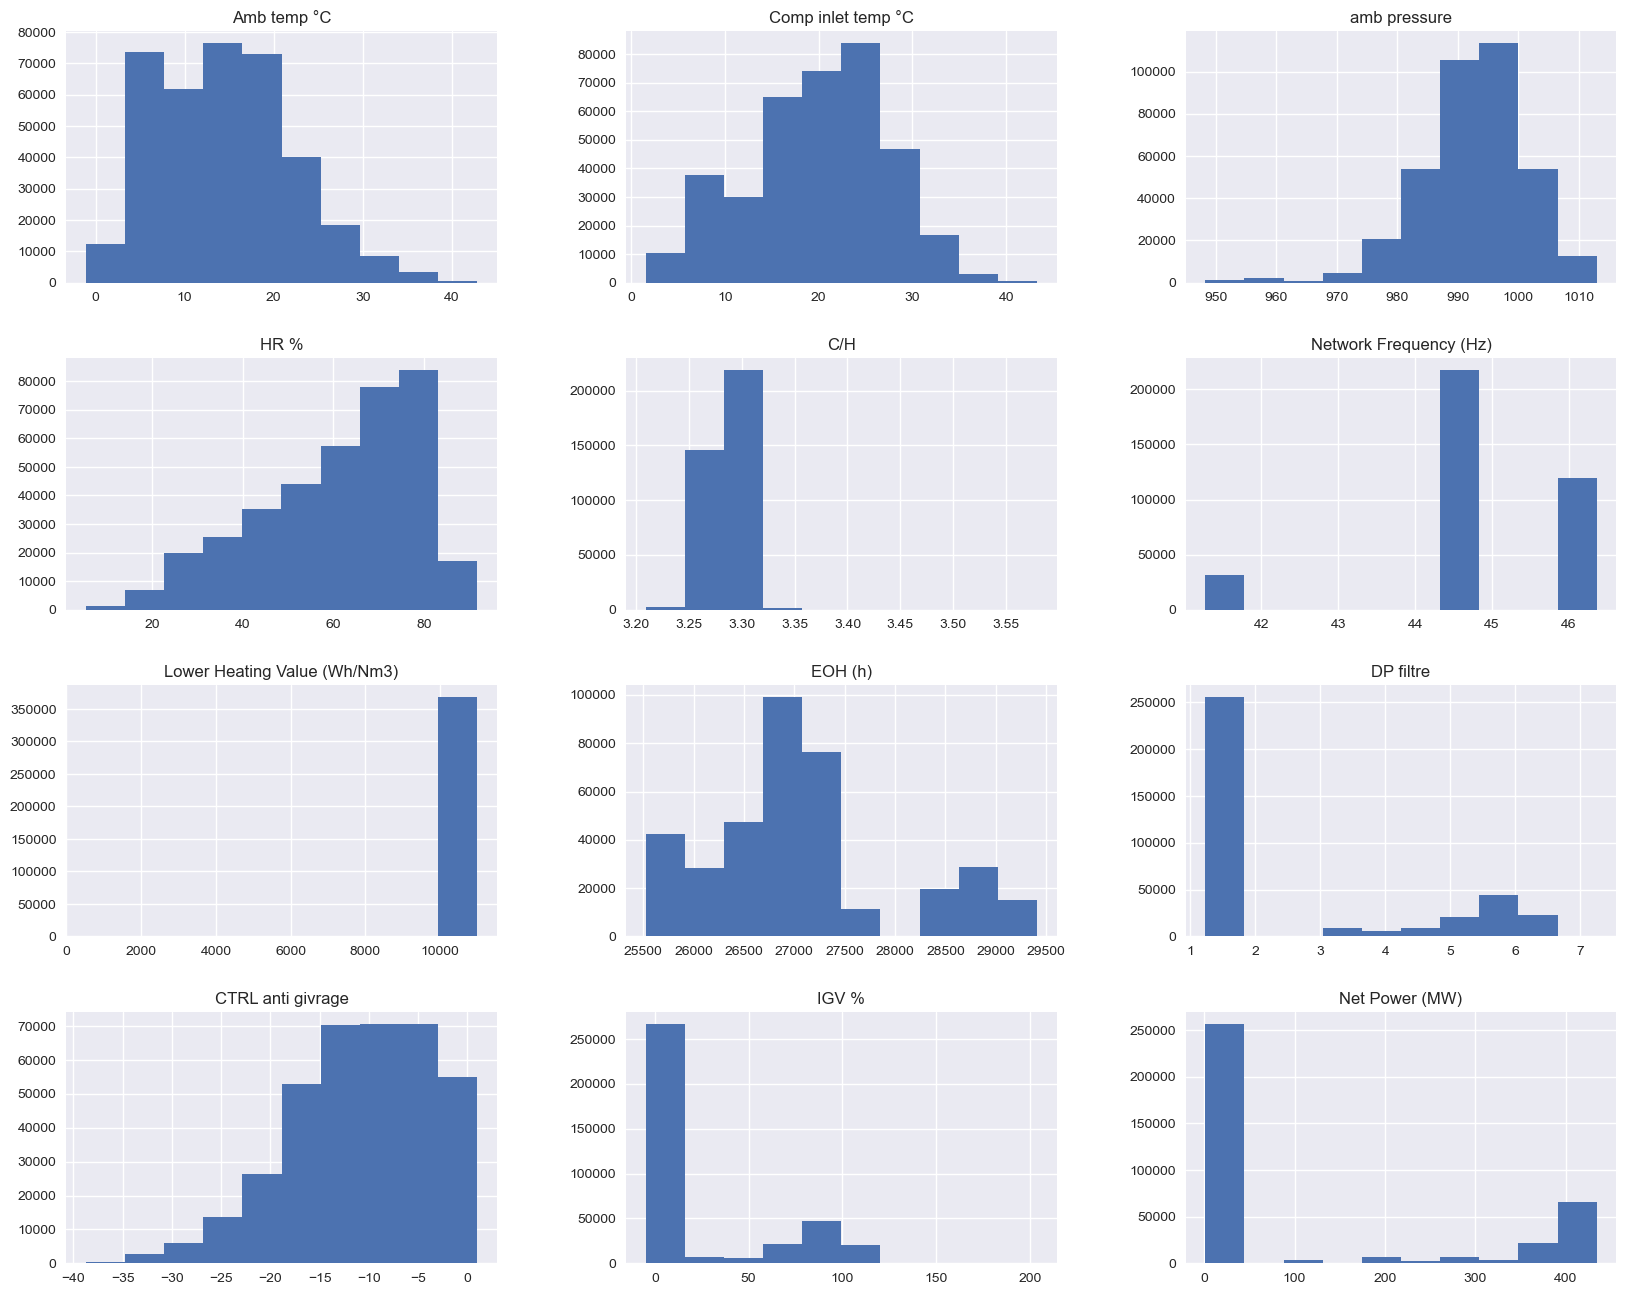

In [19]:
data.hist(figsize=(20,16))

## Net Power (MW)

<Axes: xlabel='time'>

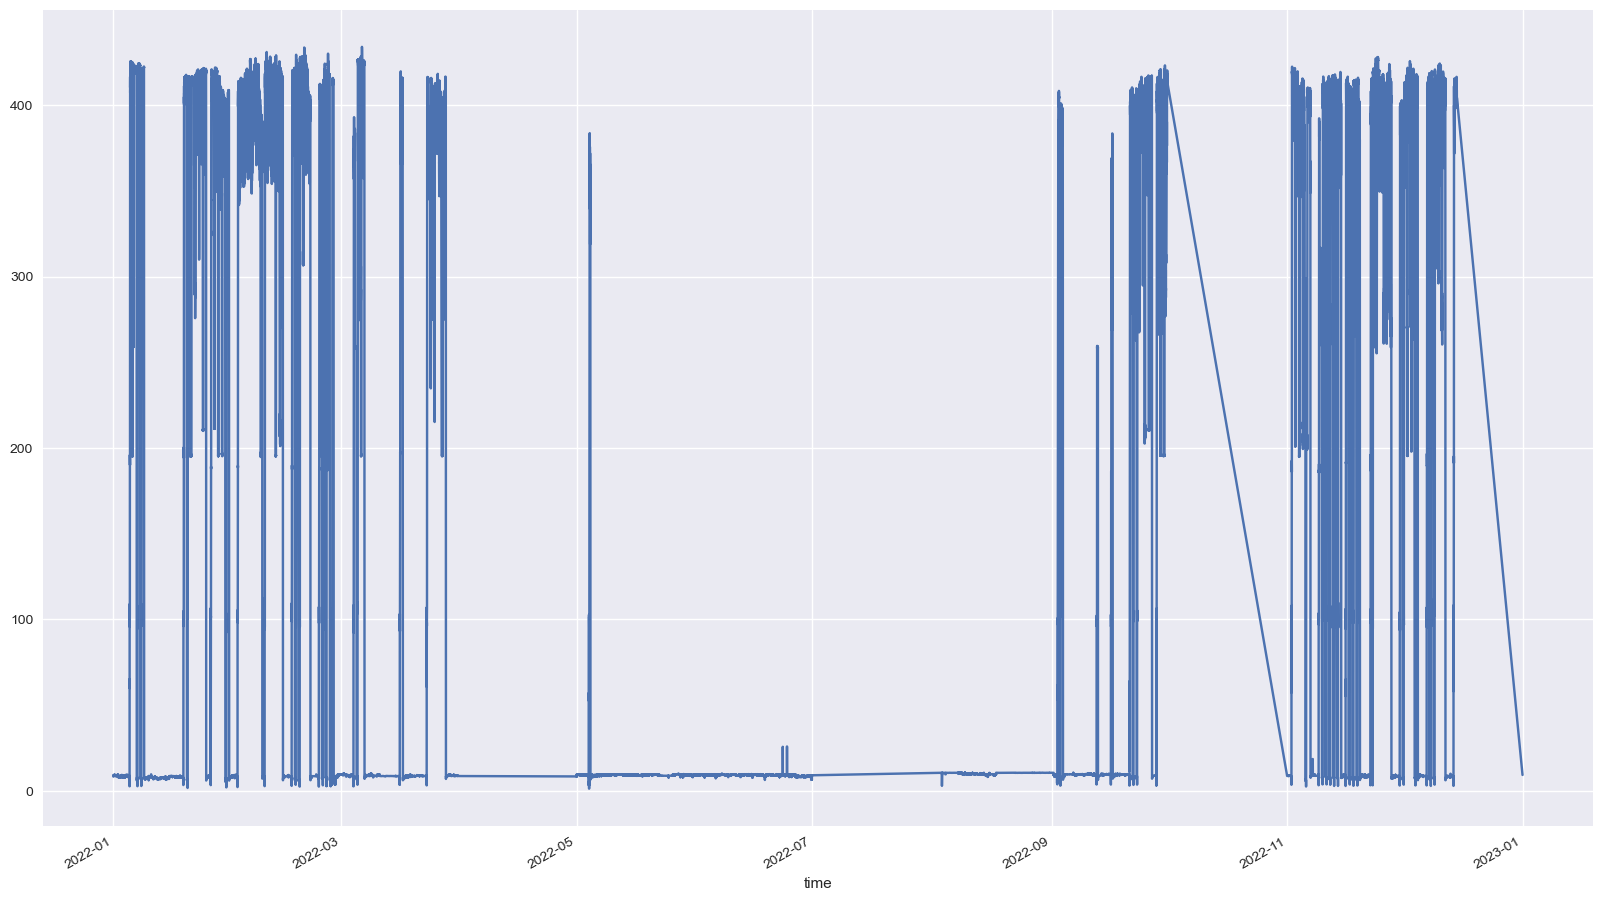

In [20]:
data["Net Power (MW)"].plot(figsize=(20,12))

Let's see if there is any correlation between the Net power (MW) and speed by taking a look at one of them, function of the other.

In [21]:
x_var = "Amb temp °C"
y_var = "Net Power (MW)"
# data.plot.scatter(x=x_var,y=y_var)

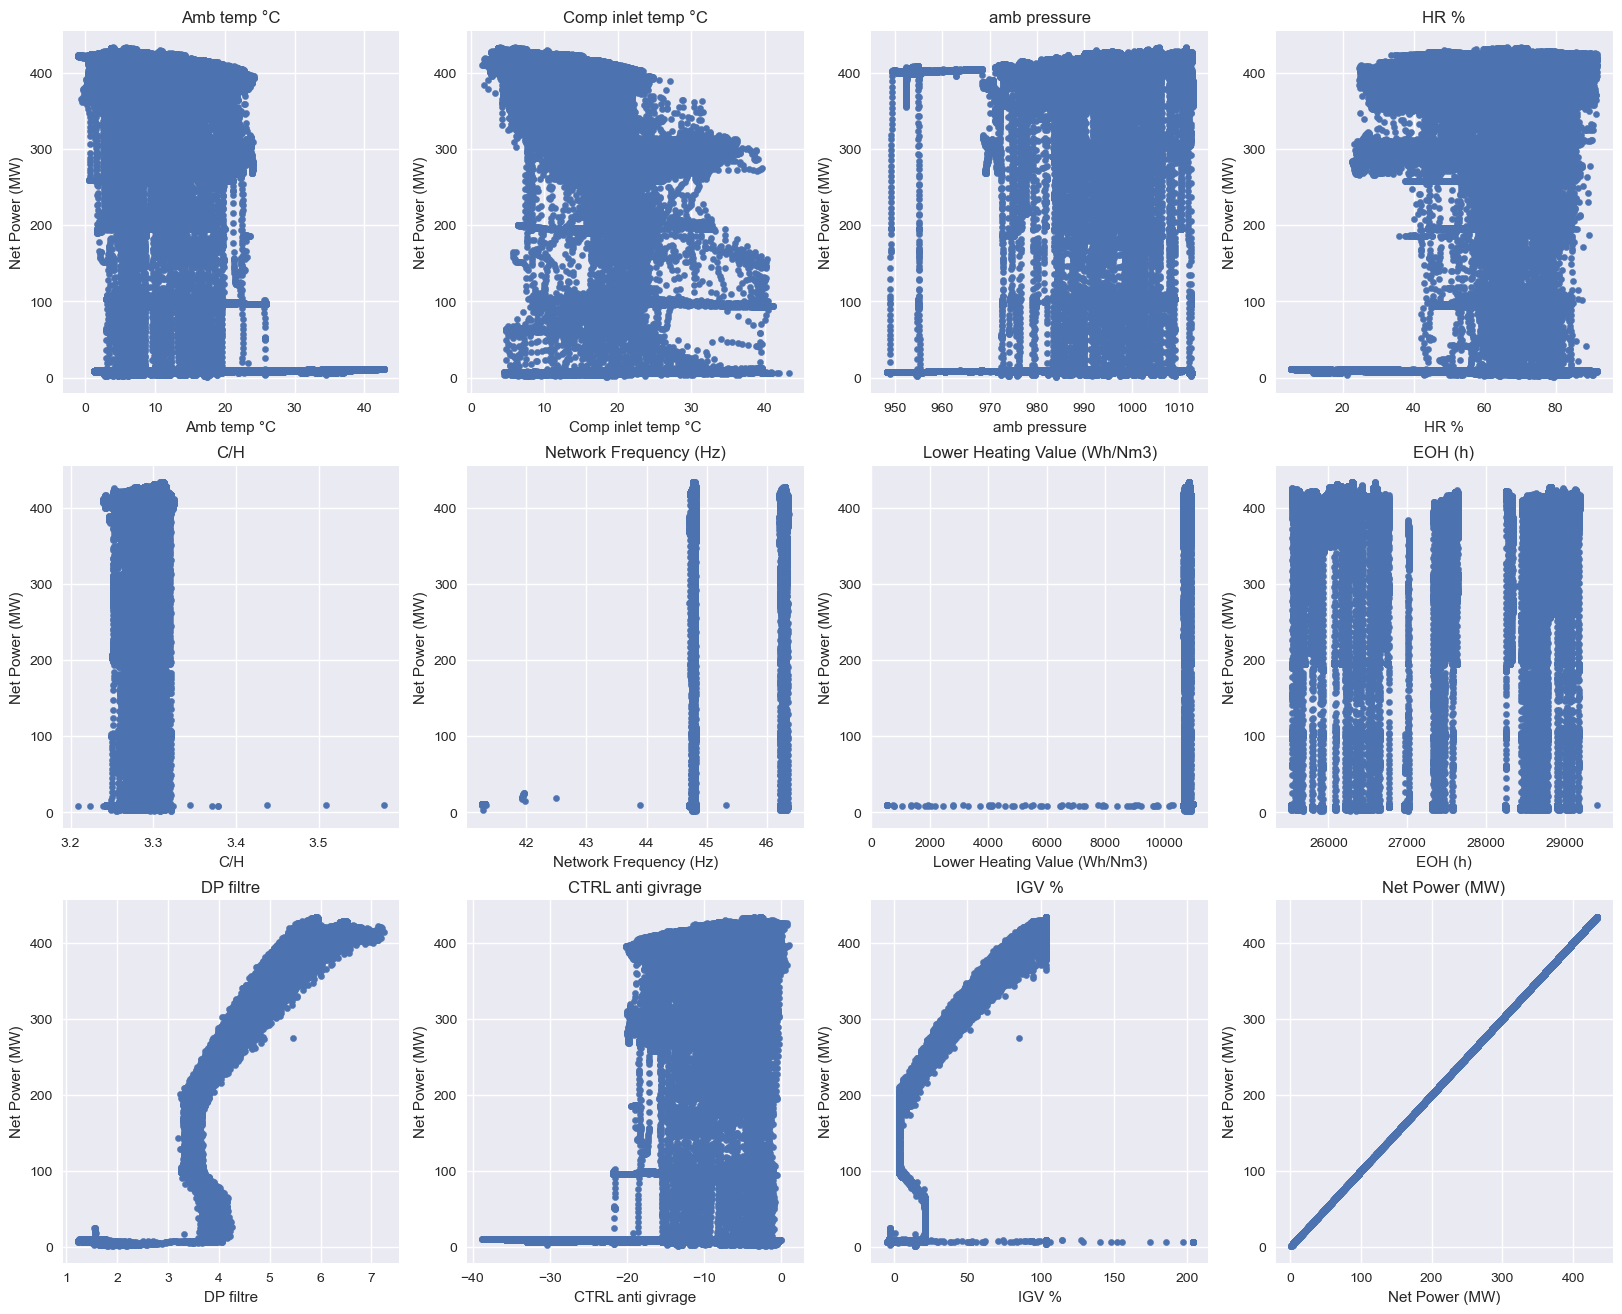

In [22]:
fig, ax = plt.subplots(figsize=(20,16),nrows=3, ncols=4)

for i,col in enumerate(data.columns):
    data.plot.scatter(x=col,y=y_var,ax=ax[i//4,i%4],title=col)

The correlation between the variables is not obvious expect for the variables 'DP filtre' and 'IGV %'. Let's take a closer look at the values of the correlations.

In [23]:
data.corr()

,Amb temp °C,Comp inlet temp °C,amb pressure,HR %,C/H,Network Frequency (Hz),Lower Heating Value (Wh/Nm3),EOH (h),DP filtre,CTRL anti givrage,IGV %,Net Power (MW)
Amb temp °C,1.000000,0.832129,-0.058992,-0.646158,-0.201480,-0.258454,-0.096914,0.258548,-0.394582,-0.989054,-0.406914,-0.410724
Comp inlet temp °C,0.832129,1.000000,-0.091896,-0.486919,-0.166690,-0.248427,-0.079689,0.196532,-0.676609,-0.818888,-0.713263,-0.697757
amb pressure,-0.058992,-0.091896,1.000000,-0.072914,-0.030826,0.133849,-0.074042,0.176271,0.135819,0.054058,0.098018,0.121800
HR %,-0.646158,-0.486919,-0.072914,1.000000,-0.002462,0.263973,0.012476,-0.000718,0.248770,0.692461,0.250508,0.243327
C/H,-0.201480,-0.166690,-0.030826,-0.002462,1.000000,-0.352226,0.367359,-0.442525,0.043933,0.159922,0.092335,0.080399
Network Frequency (Hz),-0.258454,-0.248427,0.133849,0.263973,-0.352226,1.000000,-0.121671,0.353539,0.273661,0.281066,0.229411,0.242274
Lower Heating Value (Wh/Nm3),-0.096914,-0.079689,-0.074042,0.012476,0.367359,-0.121671,1.000000,-0.192584,0.019890,0.077475,0.043240,0.036285
EOH (h),0.258548,0.196532,0.176271,-0.000718,-0.442525,0.353539,-0.192584,1.000000,0.122325,-0.219787,0.032371,0.061264
DP filtre,-0.394582,-0.676609,0.135819,0.248770,0.043933,0.273661,0.019890,0.122325,1.000000,0.387459,0.965999,0.991804
CTRL anti givrage,-0.989054,-0.818888,0.054058,0.692461,0.159922,0.281066,0.077475,-0.219787,0.387459,1.000000,0.396115,0.399547


In [24]:
data.corr().style.background_gradient()

,Amb temp °C,Comp inlet temp °C,amb pressure,HR %,C/H,Network Frequency (Hz),Lower Heating Value (Wh/Nm3),EOH (h),DP filtre,CTRL anti givrage,IGV %,Net Power (MW)
Amb temp °C,1.000000,0.832129,-0.058992,-0.646158,-0.201480,-0.258454,-0.096914,0.258548,-0.394582,-0.989054,-0.406914,-0.410724
Comp inlet temp °C,0.832129,1.000000,-0.091896,-0.486919,-0.166690,-0.248427,-0.079689,0.196532,-0.676609,-0.818888,-0.713263,-0.697757
amb pressure,-0.058992,-0.091896,1.000000,-0.072914,-0.030826,0.133849,-0.074042,0.176271,0.135819,0.054058,0.098018,0.121800
HR %,-0.646158,-0.486919,-0.072914,1.000000,-0.002462,0.263973,0.012476,-0.000718,0.248770,0.692461,0.250508,0.243327
C/H,-0.201480,-0.166690,-0.030826,-0.002462,1.000000,-0.352226,0.367359,-0.442525,0.043933,0.159922,0.092335,0.080399
Network Frequency (Hz),-0.258454,-0.248427,0.133849,0.263973,-0.352226,1.000000,-0.121671,0.353539,0.273661,0.281066,0.229411,0.242274
Lower Heating Value (Wh/Nm3),-0.096914,-0.079689,-0.074042,0.012476,0.367359,-0.121671,1.000000,-0.192584,0.019890,0.077475,0.043240,0.036285
EOH (h),0.258548,0.196532,0.176271,-0.000718,-0.442525,0.353539,-0.192584,1.000000,0.122325,-0.219787,0.032371,0.061264
DP filtre,-0.394582,-0.676609,0.135819,0.248770,0.043933,0.273661,0.019890,0.122325,1.000000,0.387459,0.965999,0.991804
CTRL anti givrage,-0.989054,-0.818888,0.054058,0.692461,0.159922,0.281066,0.077475,-0.219787,0.387459,1.000000,0.396115,0.399547


'DP filtre' and 'IGV %' are highly correlated with the target variable.

For a sample, the correlation is defined by : 
    

$$
\frac{\sum \limits _{i=1} ^{n} (x_{i} - \bar x) (y_{i} - \bar y)}{\sqrt{\sum \limits _{i=1} ^{n}(x_{i} - \bar x)^{2}}\sqrt{\sum \limits _{i=1} ^{n}(y_{i} - \bar y)^{2}}} 
$$

What is important to recall is that it is comprised in the range $[-1, 1]$ and : <br>
    - it is equal to 1 if the two variables are exactly the same <br>
    - it is equal to -1 if the two variables are the exact opposite <br>
    - when it is equal to 0, the two variables have nothing in common : they are independent one from the other, for example this could be the value of the bitcoin and the average wind speed in south korea, we know these two have nothing in common.<br>
    - when it is > 0, the two variables are positively correlated, this means that on average, when one goes up, the other goes up too.<br>
    - when it is < 0, the two variables are negatively correlated, this means that on average, when one goes up, the other goes down.<br>

#### EDA ideas

- features selection: drop useless variables? why? how?
- handle the nan values differently
- create new variables ? 



## Modeling

Based on this first EDA, a very simple model we can try to predict our sample is to try a linear model : 

In order to do so, we import some libraries that will be useful.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

We now cut our dataframe in two : one dataframe will be used for training, and the other one will be used to estimate what is the value of this first model we have made. 
For this, why do we not directly use the test set ? The reason is that for the test set, we do not know the exact value of the power measurement.

In [26]:
X = data.drop(columns="Net Power (MW)")
y = data["Net Power (MW)"]

print(X.shape, y.shape)

(368581, 11) (368581,)


In [27]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=0.2, shuffle=True,random_state=0)

In [28]:
def evaluate_model(model):
    print("Model name: ", type(model).__name__)
    print("Model parameters: ", model.get_params())

    # Printing model accuracy
    model_train_mae = mean_absolute_error(y_train,model.predict(X_train))
    model_test_mae = mean_absolute_error(y_eval,model.predict(X_eval))

    print("Model Mean Absolute error on the train set : %.2f" % model_train_mae)
    print("Model Mean Absolute error on the test set : %.2f" % model_test_mae)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
evaluate_model(model)

Model name:  LinearRegression
Model parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Model Mean Absolute error on the train set : 10.27
Model Mean Absolute error on the test set : 10.26


Nice ! We have our first model and it gives an error of 10.27 !..

Now wait, what is the value of that first model ? How can we know if 10.27 is actually a good error ? Well for this, a very neat way to be able to know if our model is worth anything is to compare it to a naive model. A naive model can be for example to predict everytime the same value, whatever the conditions. One of these naive model we have at hand would be to predict the mean value of the wind power in the train set. Let's see what would this model give. 

In [30]:
from sklearn.dummy import DummyRegressor

In [31]:
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

evaluate_model(dummy_model)

Model name:  DummyRegressor
Model parameters:  {'constant': None, 'quantile': None, 'strategy': 'mean'}
Model Mean Absolute error on the train set : 150.28
Model Mean Absolute error on the test set : 150.73


In [32]:
dummy_model = DummyRegressor(strategy='median')
dummy_model.fit(X_train, y_train)

evaluate_model(dummy_model)

Model name:  DummyRegressor
Model parameters:  {'constant': None, 'quantile': None, 'strategy': 'median'}
Model Mean Absolute error on the train set : 107.94
Model Mean Absolute error on the test set : 108.37


Yes ! Good news, our model did really learn something good ! We are a lot better than the 'mean' or 'median' model, around 10 times better, based on this metric.

# Next steps Modeling

We have already seen first models above : the linear model with all the variables , and two naive models (median, and mean). It will be your job from now on to determine the best model, but let's already take a look at one classic model that data scientists usually try on for nearly any subject : Random Forest. 

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_model = RandomForestRegressor(n_jobs=-1,max_samples=200)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model)

Model name:  RandomForestRegressor
Model parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': 200, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Model Mean Absolute error on the train set : 3.35
Model Mean Absolute error on the test set : 3.32


Random Forest does better than the linear model.

In [35]:
from sklearn.model_selection import cross_val_score, KFold

## Cross Validation

In [36]:
cv_rf_model = RandomForestRegressor(n_jobs=-1,max_samples=200)

In [37]:
cv_scores = []
for i in range(2, 11):
    kfold = KFold(n_splits=i)
    scores = cross_val_score(cv_rf_model, X, y,scoring="neg_mean_absolute_error", cv=kfold)
    cv_scores.append(-scores.mean())

best_cv = cv_scores.index(max(cv_scores)) + 2
print(f"The best cross-validation split is {best_cv}-fold with a mean score of {max(cv_scores)}")


The best cross-validation split is 2-fold with a mean score of 6.922763549861247


In [38]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=1/best_cv, shuffle=True,random_state=0)

In [39]:
cv_rf_model.fit(X_train, y_train)
evaluate_model(cv_rf_model)

Model name:  RandomForestRegressor
Model parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': 200, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Model Mean Absolute error on the train set : 3.24
Model Mean Absolute error on the test set : 3.20


### Modeling ideas

- Try different parameters for the models ?
- Try new models ?
- Tune parameters ?


# Predictions on test set

Now our model is fit, we can pass on to the predictions.

_Note: be careful when generating your submission file. Indeed, it needs to be a csv file with ";" as separator._

In [40]:
selected_model = rf_model #cv_rf_model

In [41]:
X_test = test.drop(columns="Net Power (MW)")

df_predictions = pd.DataFrame({
    'time': test.index,
    'Net Power (MW)': selected_model.predict(X_test),
})

df_predictions.to_csv('data/predictions.csv', date_format='%d/%m/%Y %H:%M',index=False, sep=';')
df_predictions.head()

OSError: Cannot save file into a non-existent directory: 'data'

Now it is your turn, what better model can you think of ?